# About Data and Objective

Use Decision Trees to build a regressor & Grid Search to find the optimal value for the hyperparameters for the given dataset, and evaluate your model on the appropriate metrics try and predict gas consumption (in millions of gallons) in 48 US states based upon:

Gas Tax (in cents)

Per Capita Income (dollars)

Paved Highways (in miles) &

The proportion of the population with a driver license.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from pandas import DataFrame
import pylab as pl
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("petrol_consumption.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [6]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


## Checking for outliers

In [8]:
for k,v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v<=q1 - 1.5*irq)| (v>=q3 + 1.5*irq)]
    perc = np.shape(v_col)[0] * 100/np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k,perc))

Column Petrol_tax outliers = 4.17%
Column Average_income outliers = 0.00%
Column Paved_Highways outliers = 4.17%
Column Population_Driver_licence(%) outliers = 2.08%
Column Petrol_Consumption outliers = 4.17%


<Axes: >

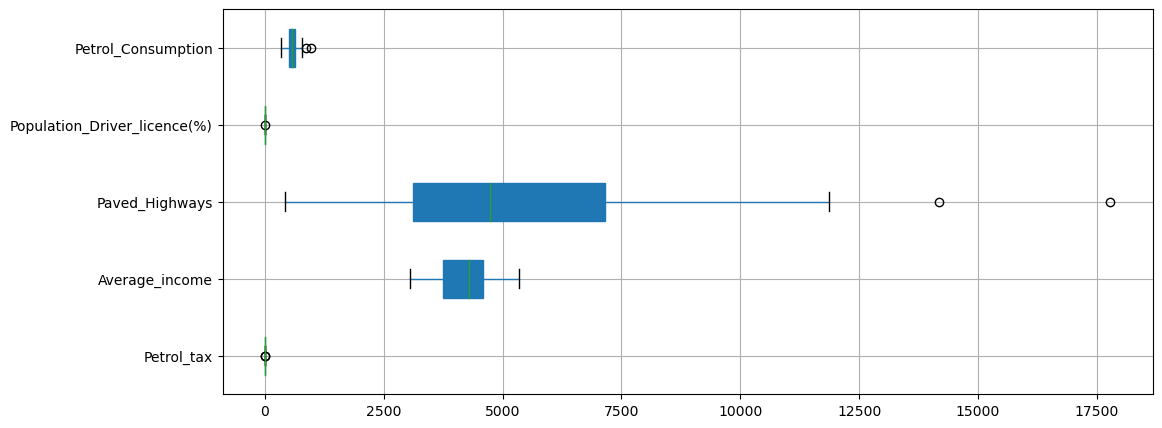

In [9]:
plt.figure(figsize = (12,5))
df.boxplot(patch_artist = True , vert = False)

***Correlation Chart***

In [10]:
my_corr = df.corr()

In [12]:
my_corr

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


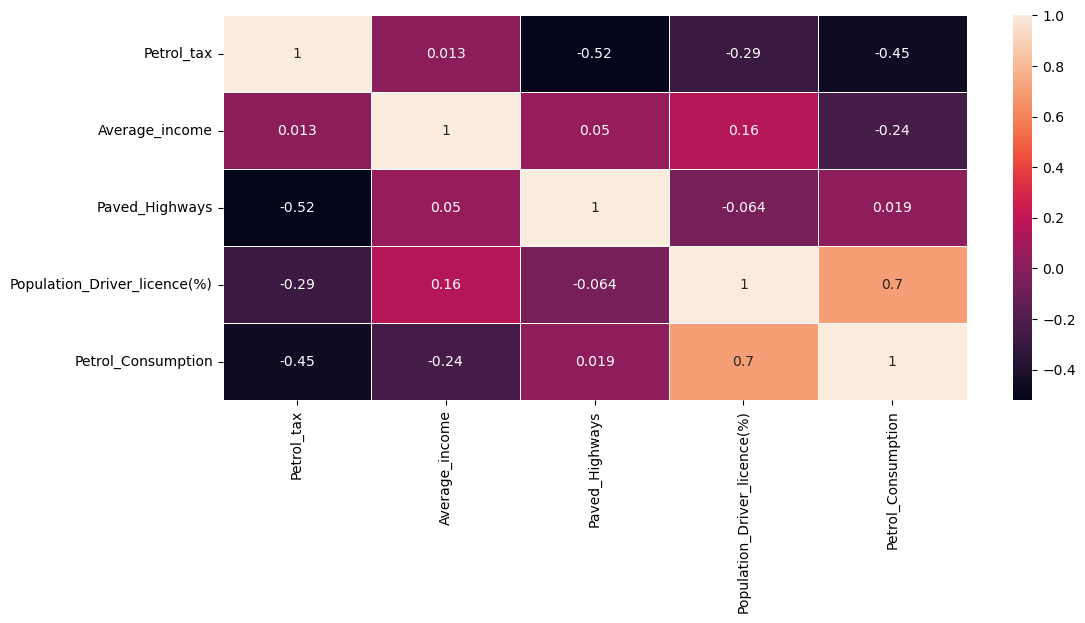

In [14]:
plt.figure(figsize = (12,5))
sns.heatmap(my_corr,linewidth = 0.5,annot = True)
plt.show()

Understanding Data: Exploratory Data Analysis
Calculating Correlation, P-value and Regression plot

To understand the spread of datapoints this regression plot has been plotted along with pearson coefficients.

The Pearson Correlation Coefficient of Petrol_tax is -0.45128027518698666  with a P-value of P = 0.0012848906734289314


(0.0, 999.2)

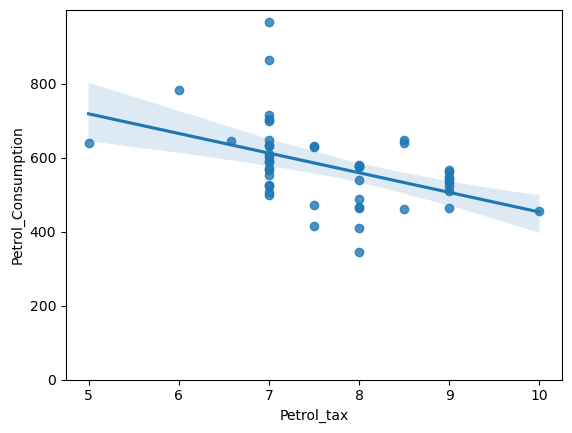

In [15]:
pearson_coef, p_value = stats.pearsonr(df['Petrol_tax'], df['Petrol_Consumption'])
print("The Pearson Correlation Coefficient of Petrol_tax is", pearson_coef, " with a P-value of P =", p_value)  
sns.regplot(x="Petrol_tax", y="Petrol_Consumption", data=df)
plt.ylim(0,)

The Pearson Correlation Coefficient of Petrol_tax is -0.24486207498269905  with a P-value of P = 0.09346842977474587


(0.0, 999.2)

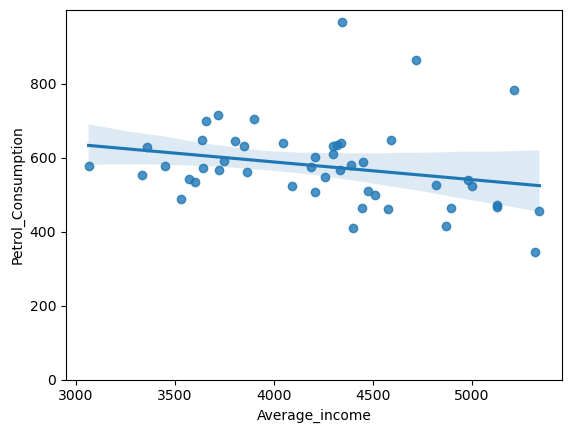

In [16]:
pearson_coef, p_value = stats.pearsonr(df['Average_income'], df['Petrol_Consumption'])
print("The Pearson Correlation Coefficient of Petrol_tax is", pearson_coef, " with a P-value of P =", p_value)  
sns.regplot(x="Average_income", y="Petrol_Consumption", data=df)
plt.ylim(0,)

We can see from the below ploted graph that the bandwith of petrol Consumption with lower petrol tax is smooth shown by (Brown Curve) it has high bandwidth as it has shallow kernel and has high density. When we look at the area under Blue Curve we can see its density and amplitude is low which shows petrol tax with High petrol consumption people are less.

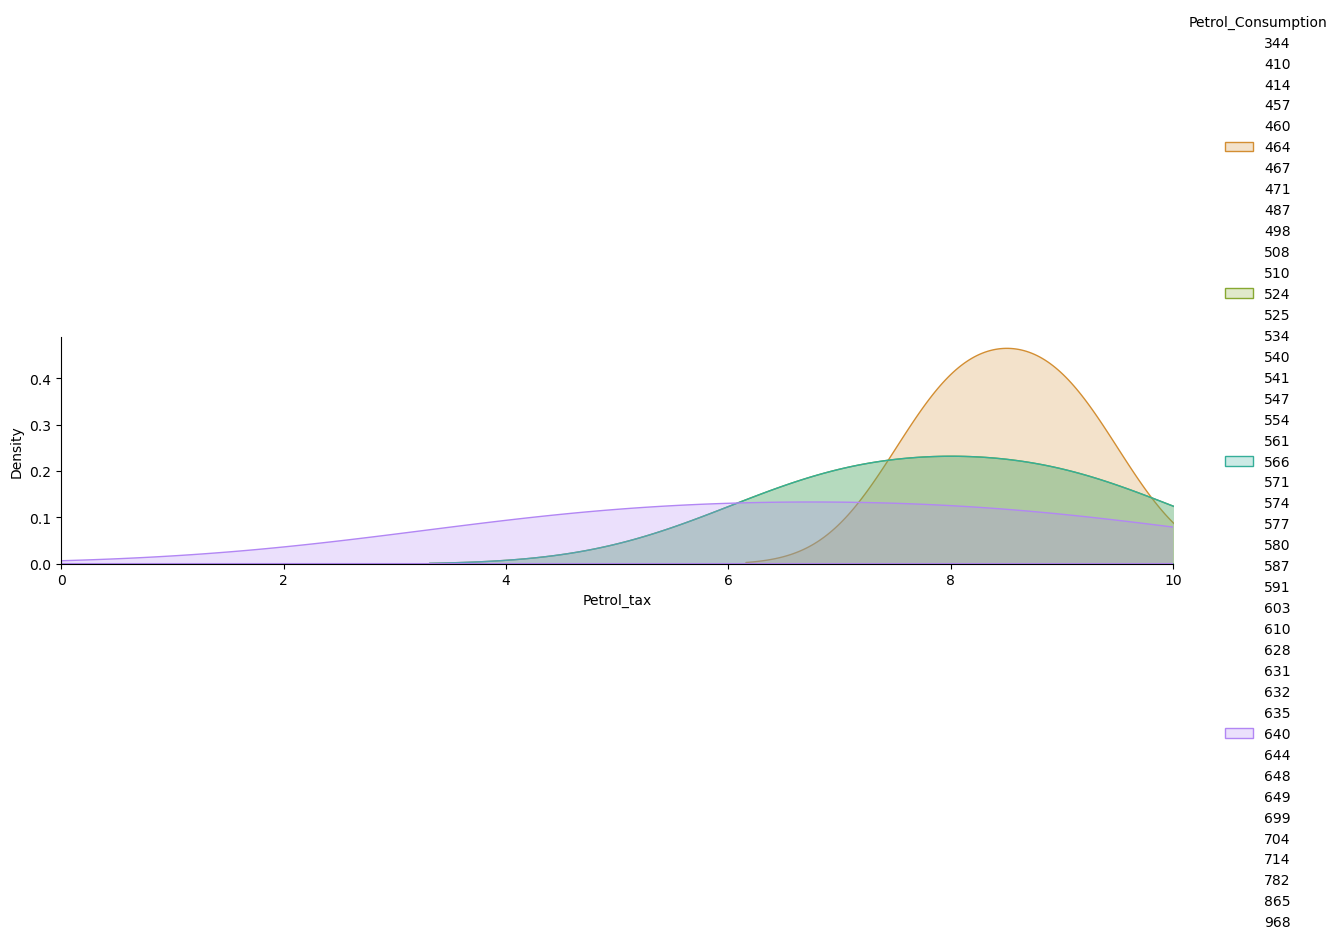

In [18]:
a = sns.FacetGrid(df, hue = 'Petrol_Consumption', aspect=4 )
a.map(sns.kdeplot, 'Petrol_tax', shade= True )
a.set(xlim=(0 ,df['Petrol_tax'].max()))
a.add_legend()

In [26]:
predictor_var= df[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']] #all columns except the last one
target_var= df['Petrol_Consumption'] #only the last column

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(predictor_var,target_var,test_size = 0.30,random_state = 123)

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
model = DecisionTreeRegressor(max_depth= 4 , max_features = 4)

In [51]:
model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=4, max_features=4)

In [52]:
y_pred = model.predict(X_test)

In [53]:
pred_df = pd.DataFrame({"predicted_val":y_pred,"ActualValue":Y_test})

In [54]:
pred_df

,predicted_val,ActualValue
18,709.0,865
13,709.0,508
26,585.0,577
31,709.0,554
10,428.0,580
40,709.0,587
39,633.0,968
8,428.0,464
11,465.5,471
5,510.0,457


In [55]:
from sklearn import metrics

In [56]:
metrics.mean_absolute_error(Y_test,y_pred)

104.73333333333333

In [58]:
np.sqrt(metrics.mean_squared_error(Y_test,y_pred))

134.88632745142604

In [59]:
metrics.r2_score(Y_test,y_pred)

0.21283714353178962

***Checking How much each feature give impact on each column***

In [70]:
model.feature_importances_
pd.Series(model.feature_importances_,index=predictor_var.columns).sort_values(ascending=False)


Petrol_tax                      0.353041
Paved_Highways                  0.261553
Average_income                  0.225363
Population_Driver_licence(%)    0.160043
dtype: float64

## Using Gridsearch & Cross Validation appropriately


In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = [{"max_depth":[3,4,5,None], "max_features":[3,4,5,6,7]}]

In [80]:
gs = GridSearchCV(estimator = DecisionTreeRegressor(random_state= 123), param_grid = param_grid,cv = 10)

In [81]:
gs.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid=[{'max_depth': [3, 4, 5, None],
                          'max_features': [3, 4, 5, 6, 7]}])

In [82]:
gs.cv_results_["params"]

[{'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': 5},
 {'max_depth': 3, 'max_features': 6},
 {'max_depth': 3, 'max_features': 7},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': 5},
 {'max_depth': 4, 'max_features': 6},
 {'max_depth': 4, 'max_features': 7},
 {'max_depth': 5, 'max_features': 3},
 {'max_depth': 5, 'max_features': 4},
 {'max_depth': 5, 'max_features': 5},
 {'max_depth': 5, 'max_features': 6},
 {'max_depth': 5, 'max_features': 7},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4},
 {'max_depth': None, 'max_features': 5},
 {'max_depth': None, 'max_features': 6},
 {'max_depth': None, 'max_features': 7}]

In [83]:
gs.cv_results_["rank_test_score"]

array([ 6,  1,  1,  1,  1,  5,  9,  9,  9,  9,  7, 13, 13, 13, 13,  8, 17,
       17, 17, 17])

In [84]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features=4, random_state=123)

In [85]:
tree = DecisionTreeRegressor(max_depth=3,max_features=4)

In [86]:
tree.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3, max_features=4)

In [87]:
pred = tree.predict(X_test)

In [88]:
pred_df=pd.DataFrame({'Actual':Y_test, 'Predicted':pred})

In [91]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,pred)))
print('r2_score:', metrics.r2_score(Y_test,pred))


Mean Absolute Error: 80.11111111111113
Mean Squared Error: 8669.100000000002
Root Mean Squared Error: 93.10800180435622
r2_score: 0.6249382764002026
